In [214]:
import pandas as pd
# Variables
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [215]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [216]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [217]:
train.shape

(891, 12)

In [218]:
test.shape

(418, 11)

In [219]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [220]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [221]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [222]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  #setting seaborn default for plots

In [223]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot (kind = 'bar', stacked=True, figsize=(10,5))

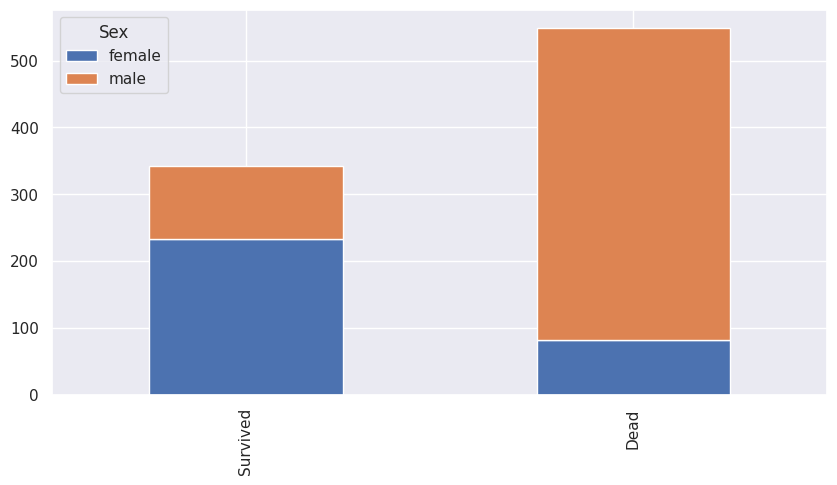

In [224]:
bar_chart('Sex')

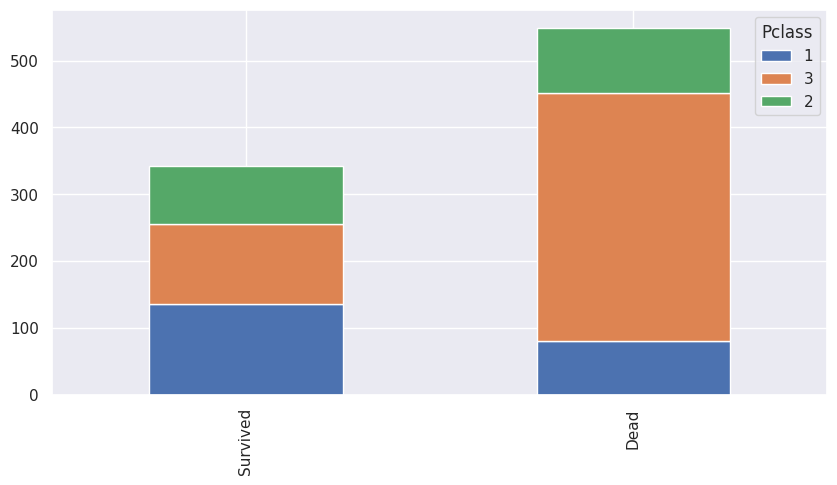

In [225]:
bar_chart('Pclass')

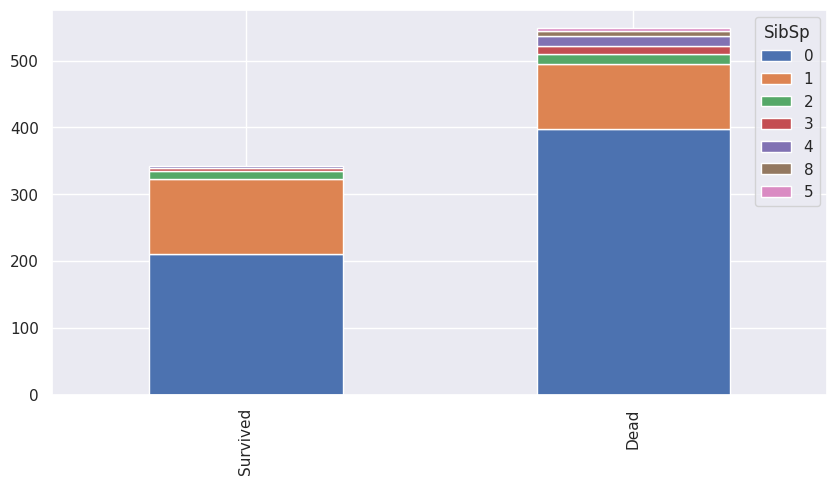

In [226]:
bar_chart('SibSp')

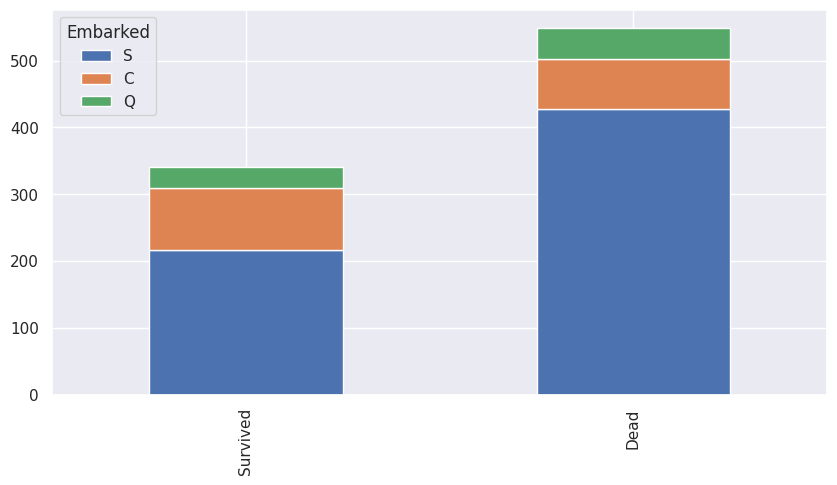

In [227]:
bar_chart('Embarked')

In [228]:
train_test_data = [train, test]  # train va test datasetlarni birlashtirish

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [229]:
train['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [230]:
test['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [231]:
title_mapping = {"Mr":0, "Miss": 1, "Mrs": 2,
                 "Master":3, "Dr": 3, "Rev":3, "Major": 3, "Mlle": 3, "Mlle": 3, "Countress" :3,
                "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3, "Mme":3, "Capt":3, "Sir":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

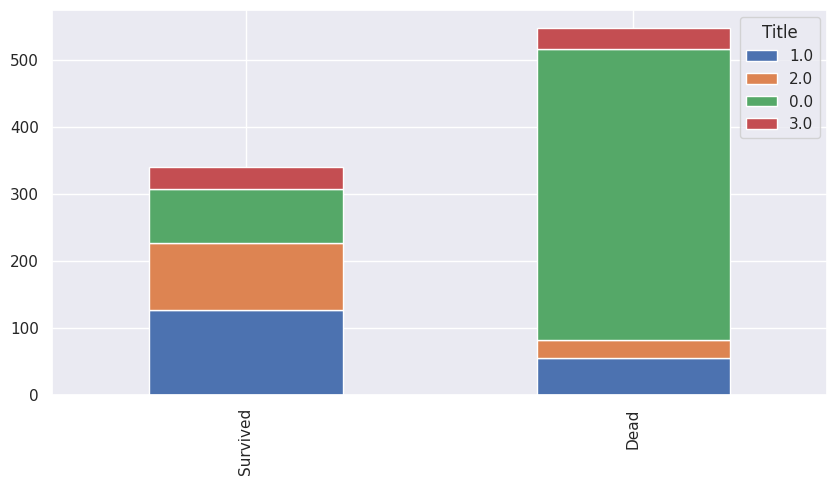

In [232]:
bar_chart("Title")

In [233]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [234]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [235]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [236]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset["Sex"].map(sex_mapping)

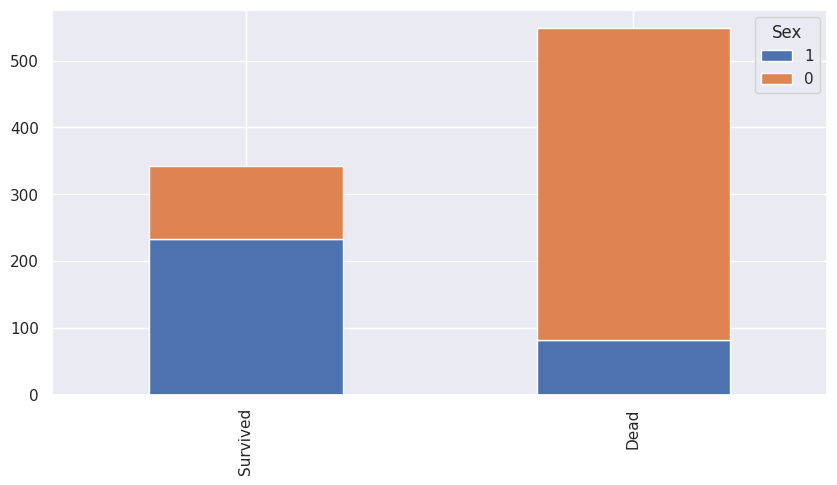

In [237]:
bar_chart("Sex")

In [238]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2.0


In [239]:
# yetishmayotgan yoshni har bir nom uchun o'rtacha yosh qiymati bilan to'ldirish
train["Age"] = train["Age"].fillna(train.groupby("Title")["Age"].transform('median'))
test["Age"] = test["Age"].fillna(train.groupby("Title")["Age"].transform('median'))

In [240]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


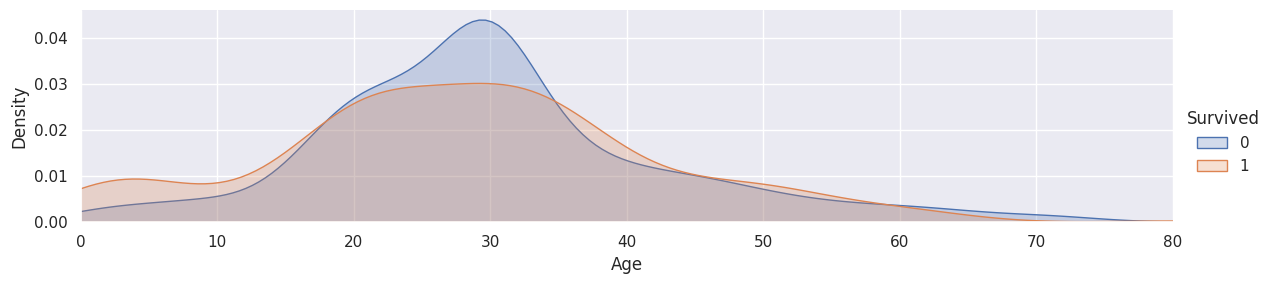

In [241]:
# yosh oralig'ida zararlanganlar va vafot etganlar
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 20.0)

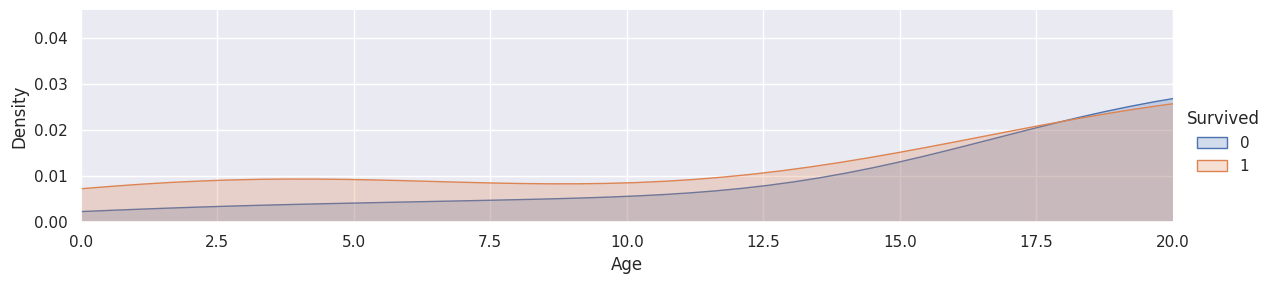

In [242]:
# 0 dan 20 yosh oralig'ida zararlanganlar va vafot etganlar
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(20.0, 30.0)

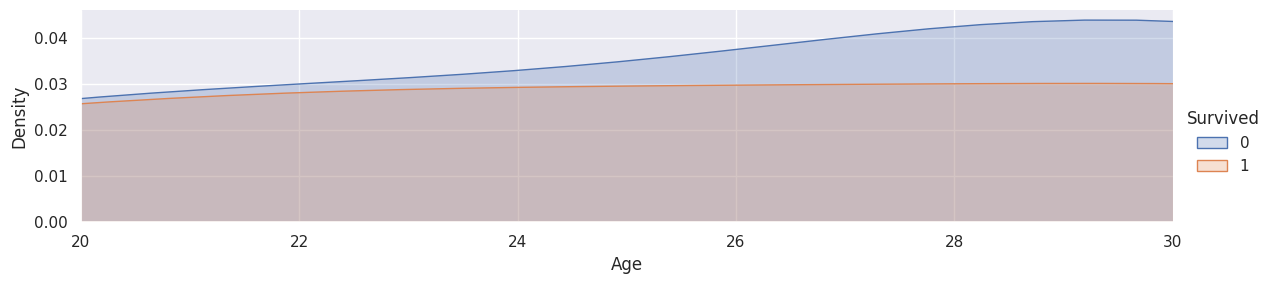

In [243]:
# 20 dan 30 yosh oralig'ida zararlanganlar va vafot etganlar
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(30.0, 40.0)

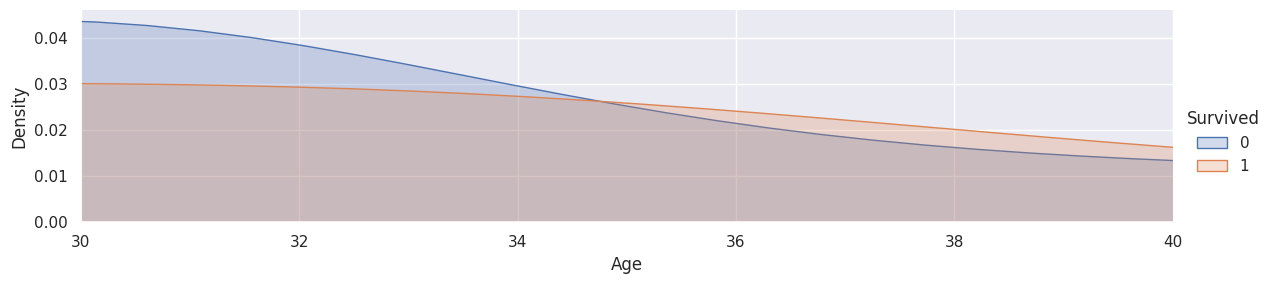

In [244]:
# 30 dan 40 yosh oralig'ida zararlanganlar va vafot etganlar
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(40.0, 60.0)

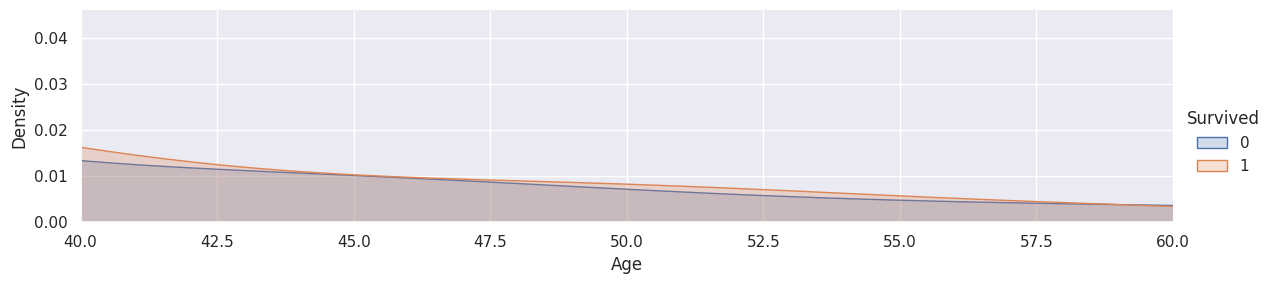

In [245]:
# 40 dan 60 yosh oralig'ida zararlanganlar va vafot etganlar
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

In [246]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        888 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [247]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2        
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3   
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 1

In [248]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0.0


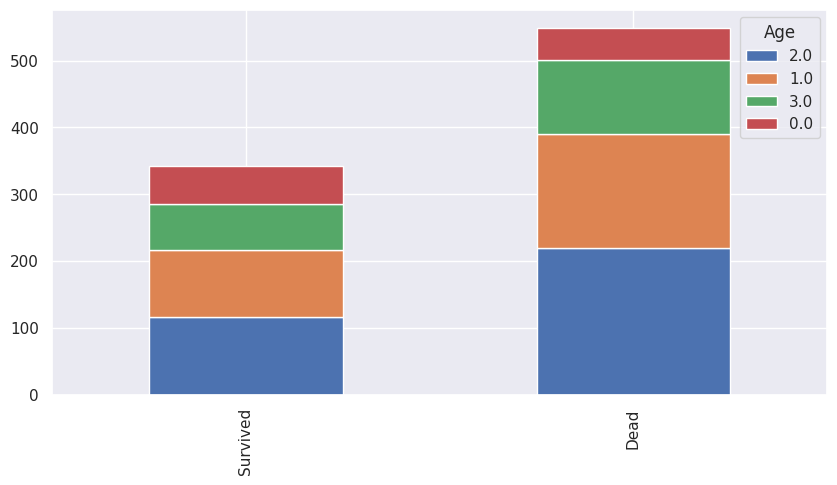

In [249]:
bar_chart("Age")

<Axes: >

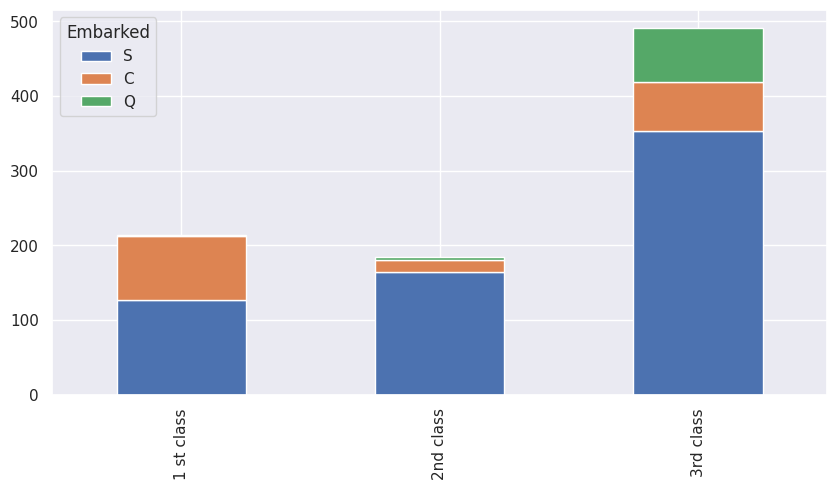

In [250]:
# Embarked ustunidagi missing qiymatlarni to'ldirish uchun chipta classlaridan foydalanamiz
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1 st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked=True, figsize=(10,5))

In [251]:
# Embarked ustunidagi S, C, Q qiymatlarini almashtirib olamiz
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

In [252]:
# yetishmayotgan ta'rifni har bir Pclass uchun o'rtacha ta'rif bilan to'ldirish
train["Age"] = train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform('median'))
test["Age"] = test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform('median'))

In [253]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,7.2500,1,0,A/5 21171,7.2500,NaN,0.0,0.0
1,2,1,1,1,71.2833,1,0,PC 17599,71.2833,C85,1.0,2.0
2,3,1,3,1,7.9250,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0
3,4,1,1,1,53.1000,1,0,113803,53.1000,C123,0.0,2.0
4,5,0,3,0,8.0500,0,0,373450,8.0500,NaN,0.0,0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


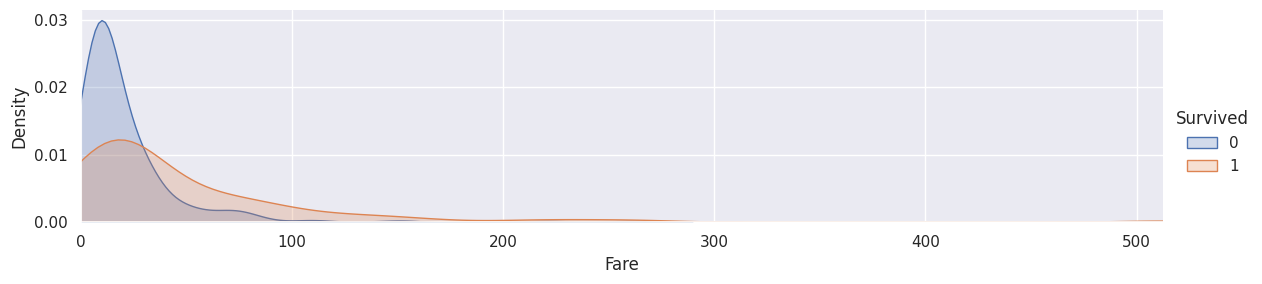

In [254]:
# qaysi klassdan foydalangan yo'lovchilar ko'proqligini ko'rish
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 20.0)

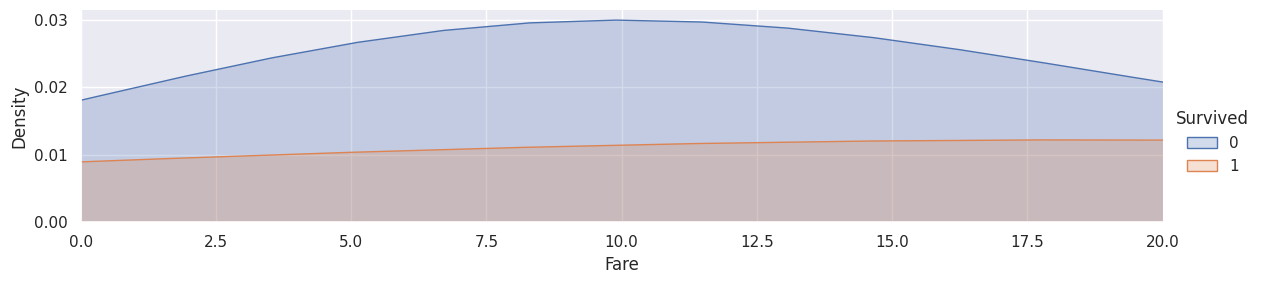

In [255]:
# 0 dan 20 yosh oralig'ida zararlanganlar va vafot etganlar
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 30.0)

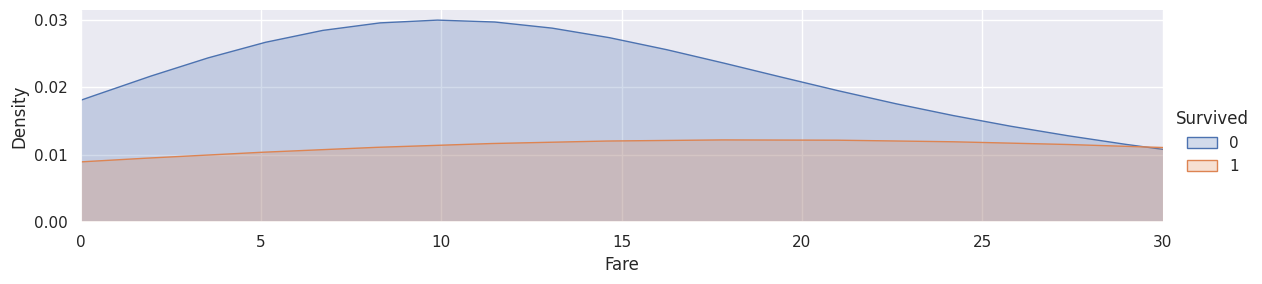

In [256]:
# 0 dan 30 yosh oralig'ida zararlanganlar va vafot etganlar
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, 'Fare', fill=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

In [257]:
# bizga berilgan numerical chipta narxlarini kategoriyali qiymatlarga almashtiramiz
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2        
    dataset.loc[ dataset['Fare'] > 10, 'Fare'] = 3

In [258]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,7.2500,1,0,A/5 21171,0.0,NaN,0.0,0.0
1,2,1,1,1,71.2833,1,0,PC 17599,2.0,C85,1.0,2.0
2,3,1,3,1,7.9250,0,0,STON/O2. 3101282,0.0,NaN,0.0,1.0
3,4,1,1,1,53.1000,1,0,113803,2.0,C123,0.0,2.0
4,5,0,3,0,8.0500,0,0,373450,0.0,NaN,0.0,0.0


In [259]:
train.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [260]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

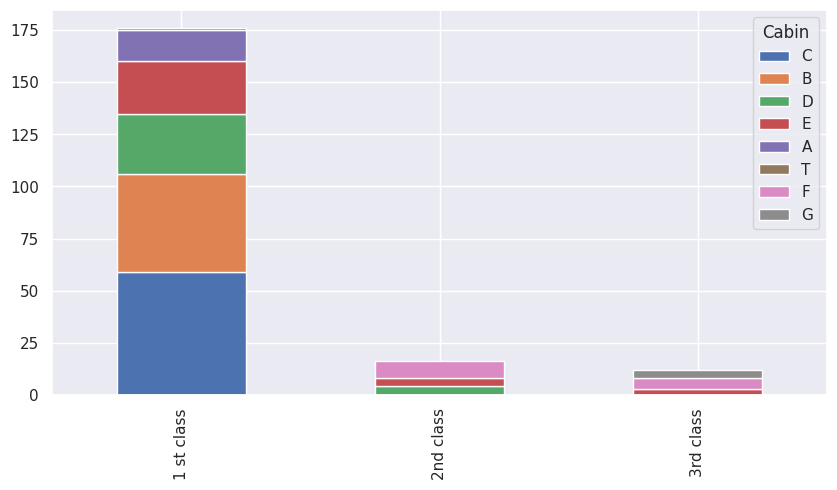

In [261]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1 st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked=True, figsize=(10,5))

In [262]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [263]:
# fill missing Cabin with median cabin for each Pclass
train["Cabin"] = train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform('median'))
test["Cabin"] = test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform('median'))

In [264]:
train['FamilySize'] = train['SibSp'] + train['Parch']+1
test['FamilySize'] = test['SibSp'] + test['Parch']+1

In [265]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,7.2500,1,0,A/5 21171,0.0,2.0,0.0,0.0,2
1,2,1,1,1,71.2833,1,0,PC 17599,2.0,0.8,1.0,2.0,2
2,3,1,3,1,7.9250,0,0,STON/O2. 3101282,0.0,2.0,0.0,1.0,1
3,4,1,1,1,53.1000,1,0,113803,2.0,0.8,0.0,2.0,2
4,5,0,3,0,8.0500,0,0,373450,0.0,2.0,0.0,0.0,1
5,6,0,3,0,8.4583,0,0,330877,0.0,2.0,2.0,0.0,1
6,7,0,1,0,51.8625,0,0,17463,2.0,1.6,0.0,0.0,1
7,8,0,3,0,21.0750,3,1,349909,1.0,2.0,0.0,3.0,5
8,9,1,3,1,11.1333,0,2,347742,0.0,2.0,0.0,2.0,3
9,10,1,2,1,30.0708,1,0,237736,2.0,1.8,1.0,2.0,2


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

(0.0, 11.0)

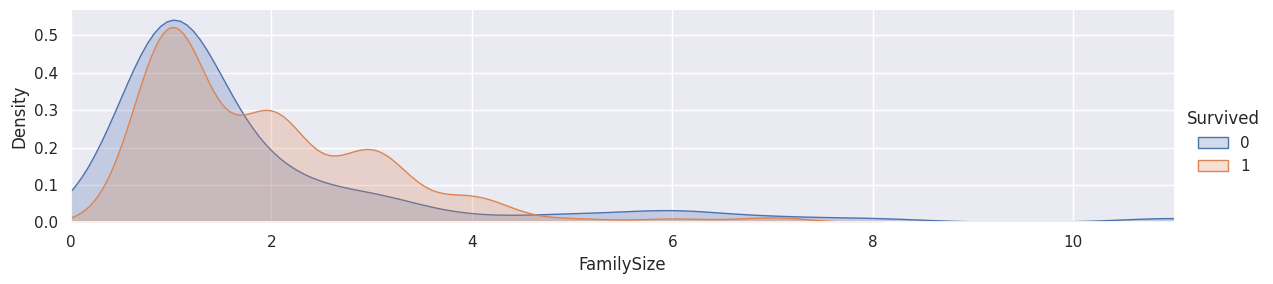

In [266]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [267]:
family_mapping = {1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [268]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,7.2500,1,0,A/5 21171,0.0,2.0,0.0,0.0,0.4
1,2,1,1,1,71.2833,1,0,PC 17599,2.0,0.8,1.0,2.0,0.4
2,3,1,3,1,7.9250,0,0,STON/O2. 3101282,0.0,2.0,0.0,1.0,0.0
3,4,1,1,1,53.1000,1,0,113803,2.0,0.8,0.0,2.0,0.4
4,5,0,3,0,8.0500,0,0,373450,0.0,2.0,0.0,0.0,0.0


In [269]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [270]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,7.2500,0.0,2.0,0.0,0.0,0.4
1,1,1,1,71.2833,2.0,0.8,1.0,2.0,0.4
2,1,3,1,7.9250,0.0,2.0,0.0,1.0,0.0
3,1,1,1,53.1000,2.0,0.8,0.0,2.0,0.4
4,0,3,0,8.0500,0.0,2.0,0.0,0.0,0.0


In [271]:
train = train.dropna()

In [272]:
train_data = train.drop("Survived", axis=1)
target = train['Survived']
train_data.shape, target.shape

((886, 8), (886,))

In [273]:
# train_data = train_data.dropna()
# train_data.info()

In [274]:
# Classifier modullarini yuklash
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC

In [275]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 886 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    886 non-null    int64  
 1   Pclass      886 non-null    int64  
 2   Sex         886 non-null    int64  
 3   Age         886 non-null    float64
 4   Fare        886 non-null    float64
 5   Cabin       886 non-null    float64
 6   Embarked    886 non-null    float64
 7   Title       886 non-null    float64
 8   FamilySize  886 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 69.2 KB


In [276]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## KNeighborsClassifier

In [277]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.6741573  0.69662921 0.78651685 0.82022472 0.82022472 0.84269663
 0.70454545 0.71590909 0.73863636 0.81818182]


In [278]:
# kNN Score
round(np.mean(score)*100, 2)

76.18

## DecisionTreeClassifier

In [279]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78651685 0.79775281 0.80898876 0.80898876 0.82022472 0.84269663
 0.79545455 0.80681818 0.80681818 0.80681818]


In [280]:
# decision tree Score
round(np.mean(score)*100, 2)

80.81

## RandomForestClassifier

In [282]:
clf = RandomForestClassifier(n_estimators = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.78651685 0.76404494 0.82022472 0.78651685 0.80898876 0.83146067
 0.79545455 0.80681818 0.79545455 0.81818182]


In [283]:
# Random Forest Score
round(np.mean(score)*100, 2)

80.14

## GaussianNB

In [284]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.74157303 0.75280899 0.7752809  0.7752809  0.80898876 0.82022472
 0.72727273 0.75       0.79545455 0.84090909]


In [285]:
# GaussianNB Score
round(np.mean(score)*100, 2)

77.88

## SVC

In [286]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.60674157 0.60674157 0.69662921 0.79775281 0.76404494 0.70786517
 0.64772727 0.65909091 0.69318182 0.56818182]


In [287]:
# SVC Score
round(np.mean(score)*100, 2)

67.48

## Submission

In [ ]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})

submission.to_csv('submission.csv', index = False)